In [17]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [18]:
#starting some initial exploration

#read in CSV
hr_df = pd.read_csv("./hr_data.csv")

#review DF
hr_df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [19]:
#find out what is in the columns

print(hr_df.info())

print(hr_df.describe())

print(hr_df.describe(include = ['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB
None
              Age  Projects Completed  Productivity (%)  \
count  200.000000          200.000000        200.000000   
mean    34.650000           11.45

Summary:
* 200 total entries, each line is a unique employee
* 5 departments
* 6 positions



In [20]:
le = LabelEncoder()
hr_df['gender_binary'] = le.fit_transform(hr_df['Gender'])
hr_df['dept_no'] = le.fit_transform(hr_df['Department'])
hr_df['position_no'] = le.fit_transform(hr_df['Position'])

hr_df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,gender_binary,dept_no,position_no
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,1,3,0
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,0,2,3
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,1,2,0
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,0,3,1
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,1,2,5


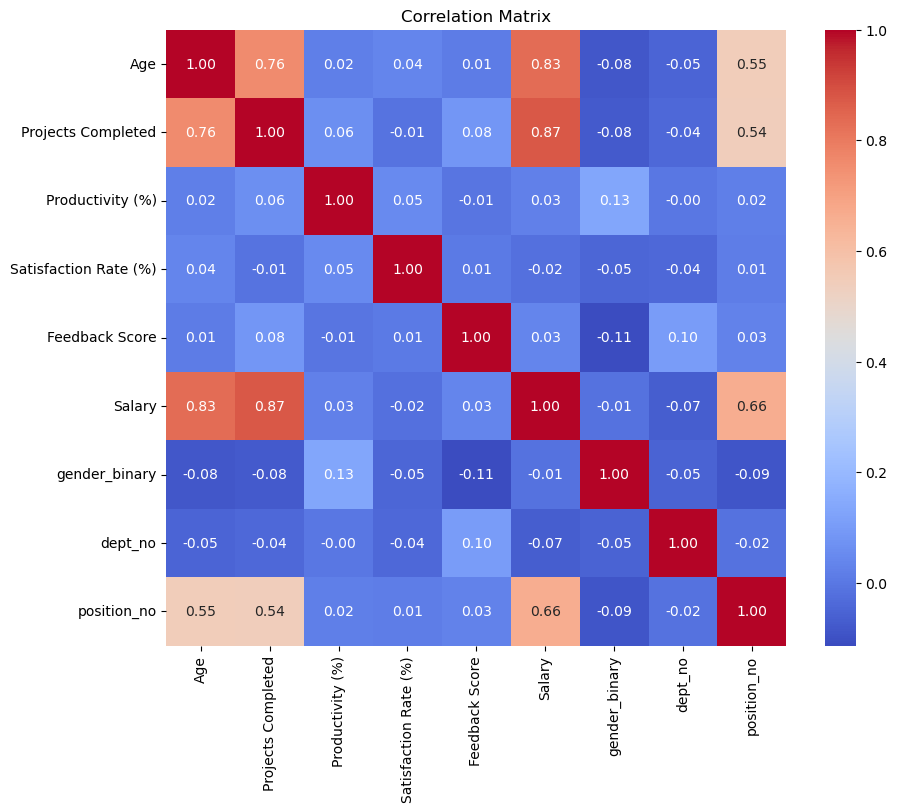

In [21]:
#correlation heatmap

# Correlation matrix
corr = hr_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()